In [1]:
%pip install -r ../requirements.txt --quiet


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [30]:
df = pd.read_csv('../data/sales_ads_train.csv')
df.head()

,ID,Cena,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,Moc_KM,Pojemnosc_cm3,Rodzaj_paliwa,Emisja_CO2,Naped,Skrzynia_biegow,Typ_nadwozia,Liczba_drzwi,Kolor,Kraj_pochodzenia,Pierwszy_wlasciciel,Data_pierwszej_rejestracji,Data_publikacji_oferty,Lokalizacja_oferty,Wyposazenie
0,1,13900,PLN,Used,Renault,Grand Espace,Gr 2.0T 16V Expression,NaN,2005.0,213000.0,170.0,1998.0,Gasoline,232.0,Front wheels,Manual,minivan,5.0,blue,NaN,NaN,NaN,28/04/2021,"SŁONECZNA 1 - 99-300 Kutno, kutnowski, Łódzkie...","['ABS', 'Electric front windows', 'Drivers air..."
1,2,25900,PLN,Used,Renault,Megane,1.6 16V 110,III (2008-2016),2010.0,117089.0,110.0,1598.0,Gasoline,159.0,Front wheels,Manual,station_wagon,5.0,silver,NaN,NaN,16/06/2010,04/05/2021,"ul. Wiosenna 8 - 41-407 Imielin, Centrum (Polska)","['ABS', 'Electric front windows', 'Drivers air..."
2,3,35900,PLN,Used,Opel,Zafira,Tourer 1.6 CDTI ecoFLEX Start/Stop,C (2011-2019),2015.0,115600.0,136.0,1598.0,NaN,NaN,NaN,Manual,minivan,5.0,white,Denmark,NaN,NaN,03/05/2021,"Sianów, koszaliński, Zachodniopomorskie","['ABS', 'Electric front windows', 'Passengers ..."
3,4,5999,PLN,Used,Ford,Focus,1.6 TDCi FX Silver / Silver X,Mk2 (2004-2011),2007.0,218000.0,90.0,1560.0,Diesel,118.0,Front wheels,Manual,compact,5.0,blue,NaN,NaN,27/11/2007,02/05/2021,"Gdańsk, Pomorskie, Przymorze Wielkie","['ABS', 'Electric front windows', 'Drivers air..."
4,5,44800,PLN,Used,Toyota,Avensis,1.8,III (2009-),2013.0,NaN,NaN,1798.0,Gasoline,152.0,Front wheels,Manual,NaN,4.0,other,Poland,Yes,20/05/2013,02/05/2021,"Świdnik, świdnicki, Lubelskie","['ABS', 'Electric front windows', 'Drivers air..."


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135397 entries, 0 to 135396
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          135397 non-null  int64  
 1   Cena                        135397 non-null  int64  
 2   Waluta                      132021 non-null  object 
 3   Stan                        132075 non-null  object 
 4   Marka_pojazdu               132046 non-null  object 
 5   Model_pojazdu               132088 non-null  object 
 6   Wersja_pojazdu              87336 non-null   object 
 7   Generacja_pojazdu           93737 non-null   object 
 8   Rok_produkcji               131990 non-null  float64
 9   Przebieg_km                 131394 non-null  float64
 10  Moc_KM                      131664 non-null  float64
 11  Pojemnosc_cm3               130711 non-null  float64
 12  Rodzaj_paliwa               131987 non-null  object 
 13  Emisja_CO2    

In [17]:
df.describe()

,ID,Cena,Rok_produkcji,Przebieg_km,Moc_KM,Pojemnosc_cm3,Emisja_CO2,Liczba_drzwi
count,135397.000000,1.353970e+05,131990.000000,1.313940e+05,131664.000000,130711.000000,5.949700e+04,131033.000000
mean,67699.000000,6.306938e+04,2012.089901,1.531563e+05,151.716696,1881.811753,3.363019e+05,4.635611
std,39085.891536,8.807748e+04,7.003557,3.421378e+06,77.386471,727.605417,8.199407e+07,0.780062
min,1.000000,5.850000e+02,1923.000000,1.000000e+00,1.000000,400.000000,1.000000e+00,1.000000
25%,33850.000000,1.780000e+04,2008.000000,5.300000e+04,105.000000,1461.000000,1.200000e+02,5.000000
50%,67699.000000,3.580000e+04,2013.000000,1.448635e+05,136.000000,1798.000000,1.400000e+02,5.000000
75%,101548.000000,7.599000e+04,2017.000000,2.060000e+05,173.000000,1997.000000,1.640000e+02,5.000000
max,135397.000000,6.999000e+06,2021.000000,1.111111e+09,1398.000000,8400.000000,2.000000e+10,55.000000


In [18]:
df.describe(include=['object', 'category'])

,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rodzaj_paliwa,Naped,Skrzynia_biegow,Typ_nadwozia,Kolor,Kraj_pochodzenia,Pierwszy_wlasciciel,Data_pierwszej_rejestracji,Data_publikacji_oferty,Lokalizacja_oferty,Wyposazenie
count,132021,132075,132046,132088,87336,93737,131987,122343,131622,132038,131934,74977,40883,54699,131948,132056,132144
unique,2,2,102,1139,16014,558,8,5,2,9,14,34,1,7616,38,11920,114138
top,PLN,Used,Volkswagen,Astra,2.0 TDI,II (2012-),Gasoline,Front wheels,Manual,SUV,black,Poland,Yes,01/01/2016,03/05/2021,"Stalowa 16 - 41-506 Chorzów, Śląskie (Polska)",[]
freq,131856,115824,11692,3331,596,2396,63003,88699,84229,26419,31680,36122,40883,143,16775,857,8464


Procent braków danych w poszczególnych kolumnach:

In [53]:
missing_percent = df.isnull().mean() * 100
missing_percent.sort_values(ascending=False)

Kraj_pochodzenia           44.784403
Naped                       9.689879
Liczba_drzwi                3.066023
Pojemnosc_cm3               3.044431
Skrzynia_biegow             2.661378
Kolor                       2.545423
Rodzaj_paliwa               2.519033
Moc_KM                      2.502239
Typ_nadwozia                2.501439
Marka_pojazdu               2.471051
Stan                        2.458256
Model_pojazdu               2.429467
Wyposazenie                 2.427068
Pierwszy_wlasciciel         0.000000
Pierwszy_wlasciciel_bin     0.000000
ID                          0.000000
Cena                        0.000000
Rok_produkcji               0.000000
Cena_resid                  0.000000
dtype: float64

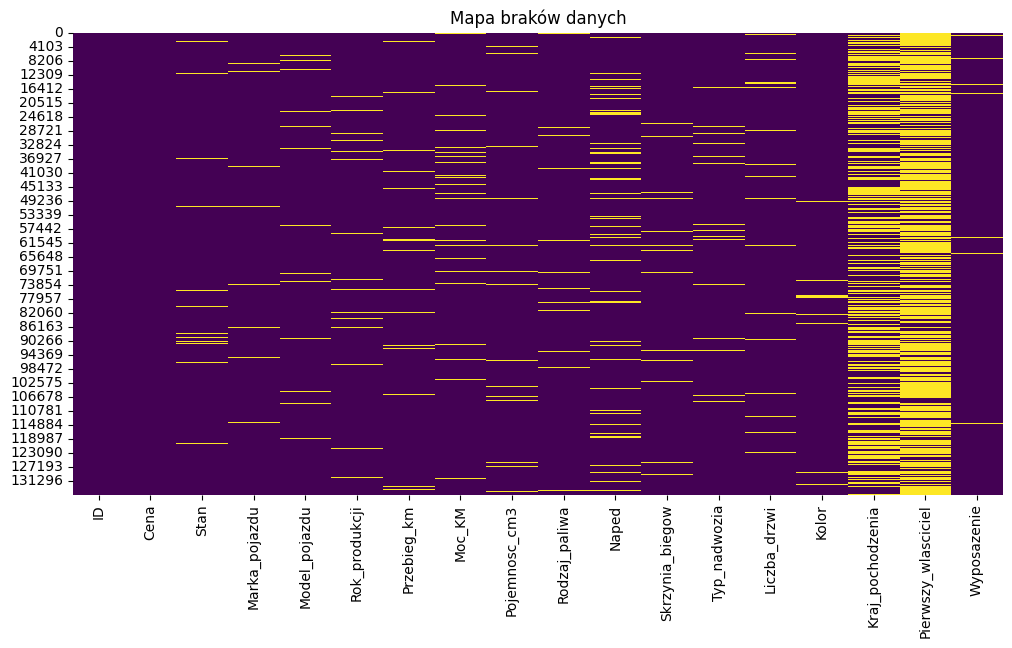

In [34]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa braków danych')
plt.show()

Usuwamy kolumny z więcej niż połową brakujących wartosci(poza informacją o pierwszym włascicielu):

In [31]:
df = df.drop(columns=['Data_pierwszej_rejestracji', 'Emisja_CO2'])

Sprawdzamy frekwencję najczęstszych wartości z każdej kolumny:

In [27]:
for col in df.drop(columns=['ID', 'Cena']).columns:
    print(f'Top 5 dla kolumny \'{col}\':')
    print(df[col].value_counts().head(5))
    print(f'Braki: {df[col].isnull().sum()}')
    print(f'Unikalne wartosci w kolumnie: {df[col].nunique()}')
    print("-" * 40)

Top 5 dla kolumny 'Waluta':
Waluta
PLN    131856
EUR       165
Name: count, dtype: int64
Braki: 3376
Unikalne wartosci w kolumnie: 2
----------------------------------------
Top 5 dla kolumny 'Stan':
Stan
Used    115824
New      16251
Name: count, dtype: int64
Braki: 3322
Unikalne wartosci w kolumnie: 2
----------------------------------------
Top 5 dla kolumny 'Marka_pojazdu':
Marka_pojazdu
Volkswagen    11692
BMW           10749
Audi          10724
Opel          10366
Ford          10223
Name: count, dtype: int64
Braki: 3351
Unikalne wartosci w kolumnie: 102
----------------------------------------
Top 5 dla kolumny 'Model_pojazdu':
Model_pojazdu
Astra      3331
A4         2958
Seria 3    2941
Golf       2625
Passat     2573
Name: count, dtype: int64
Braki: 3309
Unikalne wartosci w kolumnie: 1139
----------------------------------------
Top 5 dla kolumny 'Wersja_pojazdu':
Wersja_pojazdu
2.0 TDI              596
1.6                  540
Standard             418
1.2                  39

**Data_publikacji_oferty** i **Lokalizacja_oferty** mają bardzo dużo unikalnych wartości, co wprowadza zbędny szum do analizy.<br>
**Generacja_pojazdu** i **Wersja_pojazdu** charakteryzują się dużą liczbą braków i wysoką zmiennością, co utrudnia ich interpretację.<br>
Z tego powodu powyższe kolumny usuwamy.

In [33]:
df = df.drop(columns=['Data_publikacji_oferty', 'Lokalizacja_oferty', 'Generacja_pojazdu', 'Wersja_pojazdu'])

Chcemy ujednolicić walutę w jakiej przedstawiana jest cena do dalszej analizy. Z tego powodu odrzucamy rekordy z brakami w kolumnie 'Waluta' i przeliczamy EUR na PLN zgodnie z kursem z dnia będącego dominantą w kolumnie 'Data_publikacji_oferty':

In [32]:
conversion_rate = 4.5793
df = df.dropna(subset=['Waluta'])
mask = df['Waluta'] == 'EUR'
df.loc[mask, 'Cena'] = df.loc[mask, 'Cena'] * conversion_rate

df.drop(columns=['Waluta'], inplace=True)

In [38]:
percentiles = [0.00, 0.01, 0.03, 0.05, 0.07, 0.1, 0.5, 0.90, 0.93, 0.95, 0.97, 0.99, 0.995, 1]

for q in percentiles:
    threshold = df['Cena'].quantile(q)
    print(f"Granica dla {q*100:.0f} percentyla: {threshold:.2f}")

Granica dla 0 percentyla: 585.00
Granica dla 1 percentyla: 3200.00
Granica dla 3 percentyla: 5290.00
Granica dla 5 percentyla: 6900.00
Granica dla 7 percentyla: 7900.00
Granica dla 10 percentyla: 9800.00
Granica dla 50 percentyla: 35900.00
Granica dla 90 percentyla: 144000.00
Granica dla 93 percentyla: 172896.84
Granica dla 95 percentyla: 199999.00
Granica dla 97 percentyla: 254900.00
Granica dla 99 percentyla: 411017.40
Granica dla 100 percentyla: 544900.00
Granica dla 100 percentyla: 6999000.00


In [41]:
threshold = df['Cena'].quantile(0.95)
df = df[df['Cena'] <= threshold]

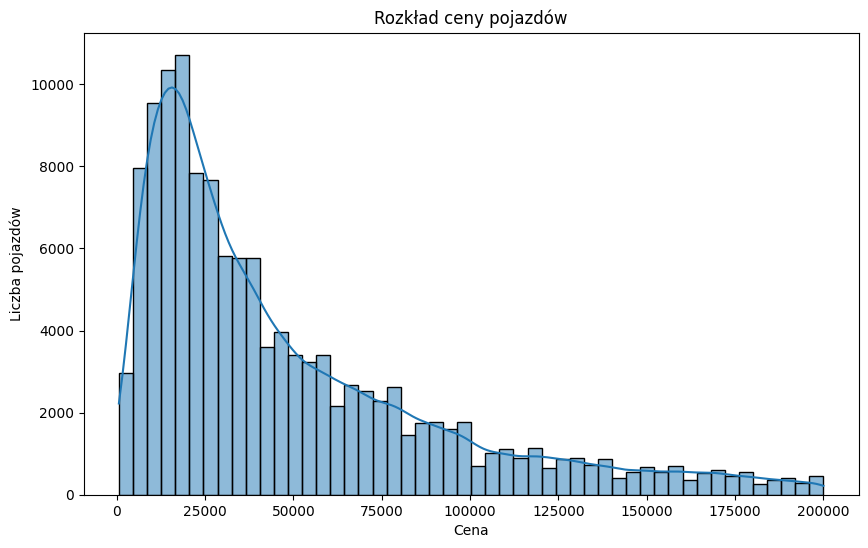

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Cena'], bins=50, kde=True)
plt.title('Rozkład ceny pojazdów')
plt.xlabel('Cena')
plt.ylabel('Liczba pojazdów')
plt.show()

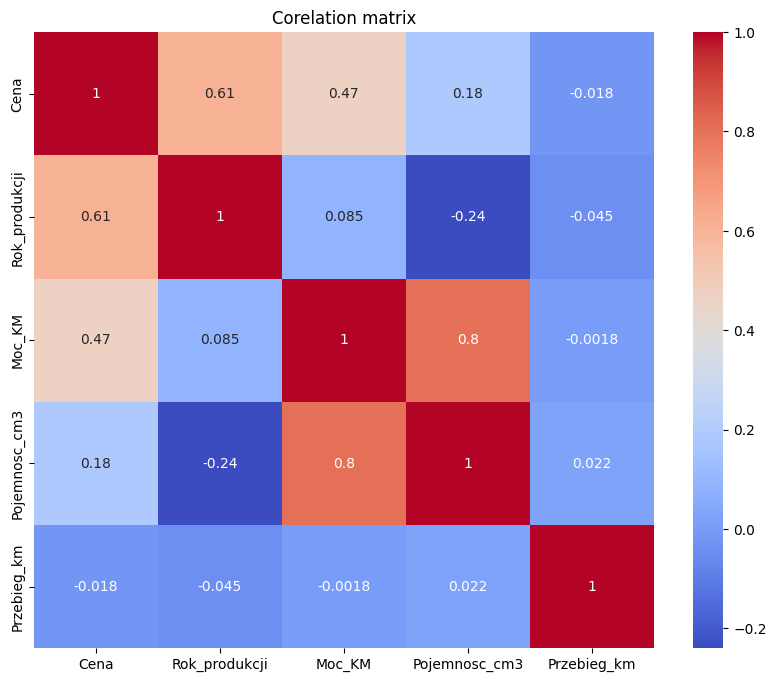

In [49]:
num_cols = ['Cena', 'Rok_produkcji', 'Moc_KM', 'Pojemnosc_cm3', 'Przebieg_km']

plt.figure(figsize=(10,8))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Corelation matrix')
plt.show()

In [50]:
df = df.dropna(subset=['Rok_produkcji'])
df = df.drop(columns=['Przebieg_km'])
df = df[~(df['Pojemnosc_cm3'].isnull() & df['Moc_KM'].isnull())]

In [51]:
import statsmodels.api as sm

df['Pierwszy_wlasciciel'] = df['Pierwszy_wlasciciel'].fillna('NO')
df['Pierwszy_wlasciciel_bin'] = df['Pierwszy_wlasciciel'].apply(lambda x: 1 if x == 'Yes' else 0)

correlation = df['Cena'].corr(df['Pierwszy_wlasciciel_bin'])
print("Korelacja między 'Pierwszy_wlasciciel' (bin) a 'Cena':", correlation)

# Sprawdzenie, czy rok produkcji tłumaczy korelację z ceną

# a) Regresja ceny na rok produkcji
X_year = sm.add_constant(df['Rok_produkcji'])
model_year = sm.OLS(df['Cena'], X_year).fit()
df['Cena_resid'] = model_year.resid

# b) Korelacja między resztami a binarną zmienną 'Pierwszy_wlasciciel_bin'
corr_resid_first = df['Cena_resid'].corr(df['Pierwszy_wlasciciel_bin'])
print("Korelacja między resztami (Cena ~ Rok_produkcji) a 'Pierwszy_wlasciciel_bin':", corr_resid_first)

# c) Regresja wieloraka: Cena ~ Rok_produkcji + Pierwszy_wlasciciel_bin
X_both = df[['Rok_produkcji', 'Pierwszy_wlasciciel_bin']]
X_both = sm.add_constant(X_both)
model_both = sm.OLS(df['Cena'], X_both).fit()
print(model_both.summary())


Korelacja między 'Pierwszy_wlasciciel' (bin) a 'Cena': 0.14074600436374546
Korelacja między resztami (Cena ~ Rok_produkcji) a 'Pierwszy_wlasciciel_bin': 0.017576072618290587
                            OLS Regression Results                            
Dep. Variable:                   Cena   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                 3.683e+04
Date:                Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:47:10   Log-Likelihood:            -1.4832e+06
No. Observations:              125048   AIC:                         2.966e+06
Df Residuals:                  125045   BIC:                         2.967e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef  

Korelacja między Moc_KM a Pojemnosc_cm3: 0.8030104306305613


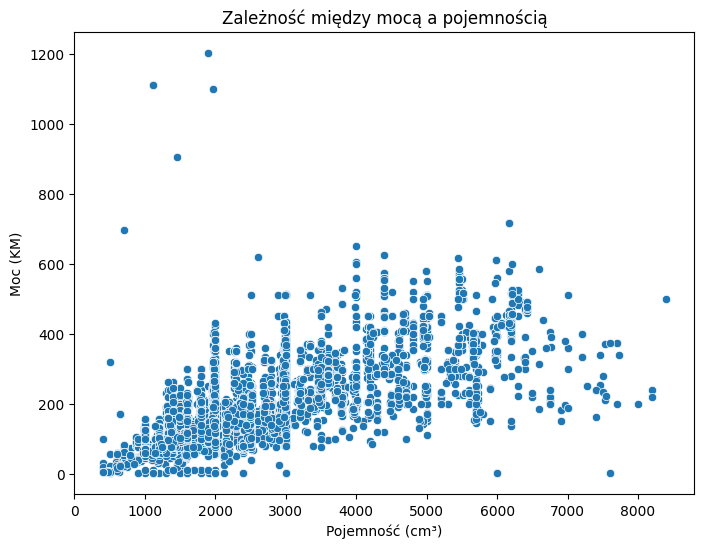

In [52]:
corr = df['Moc_KM'].corr(df['Pojemnosc_cm3'])
print("Korelacja między Moc_KM a Pojemnosc_cm3:", corr)

plt.figure(figsize=(8,6))
sns.scatterplot(x='Pojemnosc_cm3', y='Moc_KM', data=df)
plt.title("Zależność między mocą a pojemnością")
plt.xlabel("Pojemność (cm³)")
plt.ylabel("Moc (KM)")
plt.show()


In [ ]:
from scipy.stats import pointbiserialr

correlations = {}
for cat in top_categories:
    # Tworzymy zmienną dummy: 1, gdy wartość w kolumnie cat_col jest równa danej kategorii, 0 w przeciwnym przypadku
    dummy = (df[cat_col] == cat).astype(int)
    # Obliczamy korelację punktowo-biseryjną z ceną
    r, p = pointbiserialr(dummy, df['Cena'])
    correlations[cat] = r

# Zamieniamy wyniki na DataFrame i sortujemy wg współczynnika
corr_df = pd.DataFrame(list(correlations.items()), columns=[cat_col, 'Correlation'])
corr_df = corr_df.sort_values('Correlation', ascending=False)

# Rysujemy wykres słupkowy korelacji
plt.figure(figsize=(12,6))
sns.barplot(data=corr_df, x=cat_col, y='Correlation')
plt.title(f"Korelacja punktowo-biseryjna między '{cat_col}' (dummy) a ceną (dla top 20 kategorii)")
plt.xlabel(cat_col)
plt.ylabel("Współczynnik korelacji")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import ast

def convert_to_list(x):
    try:
        return ast.literal_eval(x)
    except Exception:
        return []

df['Wyposazenie_list'] = df['Wyposazenie'].apply(lambda x: convert_to_list(x) if pd.notnull(x) else [])

# Utwórz nową kolumnę zawierającą liczbę elementów wyposażenia
df['count_wyposazenie'] = df['Wyposazenie_list'].apply(len)

# Oblicz korelację między liczbą elementów wyposażenia a ceną
correlation = df['count_wyposazenie'].corr(df['Cena'])
print("Korelacja między liczbą elementów wyposażenia a ceną:", correlation)

# Opcjonalnie: wykres rozrzutu
plt.figure(figsize=(8,5))
sns.scatterplot(x='count_wyposazenie', y='Cena', data=df)
plt.title("Liczba elementów wyposażenia vs Cena")
plt.xlabel("Liczba elementów wyposażenia")
plt.ylabel("Cena")
plt.show()